In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Attribute Types and their Semantics:
track_id                     object
track_name                   object
track_artist                 object
track_popularity              int64
track_album_id               object
track_album_name             object
track_album_release_date     object
playlist_name                object
playlist_id                  object
playlist_genre               object
playlist_subgenre            object
danceability                float64
energy                      float64
key                           int64
loudness                    float64
mode                          int64
speechiness                 float64
acousticness                float64
instrumentalness            float64
liveness                    float64
valence                     float64
tempo                       float64
duration_ms                   int64
dtype: object

Statistical Properties of the Dataset:
       track_popularity  danceability        energy           key  \
count      

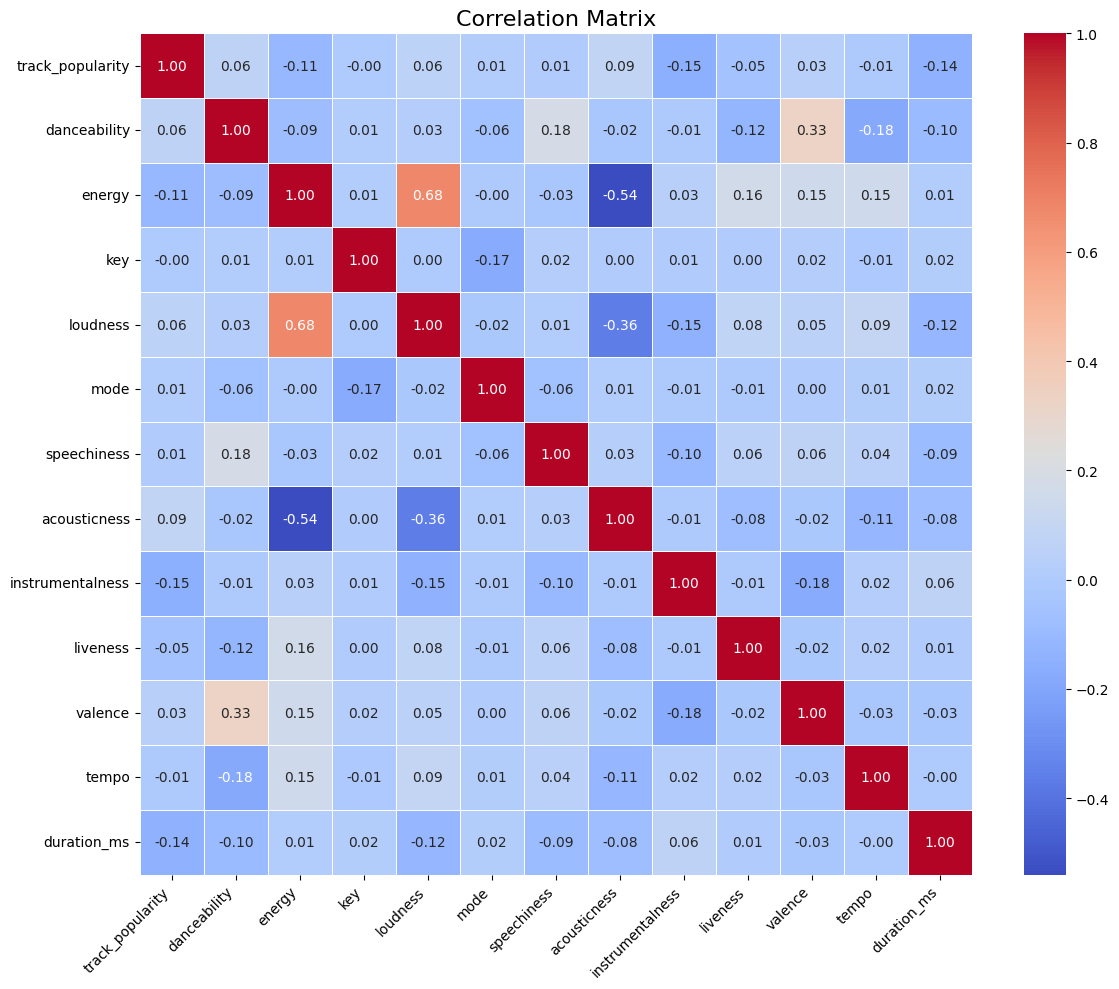

In [3]:
df = pd.read_csv("spotify_songs.csv")

# a. Attribute types and their semantics
print("\nAttribute Types and their Semantics:")
print(df.dtypes)

# b. Statistical properties of the dataset including correlations
print("\nStatistical Properties of the Dataset:")
print(df.describe())

print("\nCorrelation Matrix:")
numerical_features = df.select_dtypes(include=[np.number]).columns
corr_matrix = df[numerical_features].corr()
print(corr_matrix)
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5, fmt='.2f')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.title("Correlation Matrix", fontsize=16)
plt.tight_layout()
plt.show()


Missing Values:
track_id                    0
track_name                  5
track_artist                5
track_popularity            0
track_album_id              0
track_album_name            5
track_album_release_date    0
playlist_name               0
playlist_id                 0
playlist_genre              0
playlist_subgenre           0
danceability                0
energy                      0
key                         0
loudness                    0
mode                        0
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
tempo                       0
duration_ms                 0
dtype: int64

Outliers per Numerical Feature (Z-score > 3):
track_popularity       0
danceability         123
energy               166
key                    0
loudness             368
mode                   0
speechiness          612
acousticness         657
instrumentalness    1692
liveness

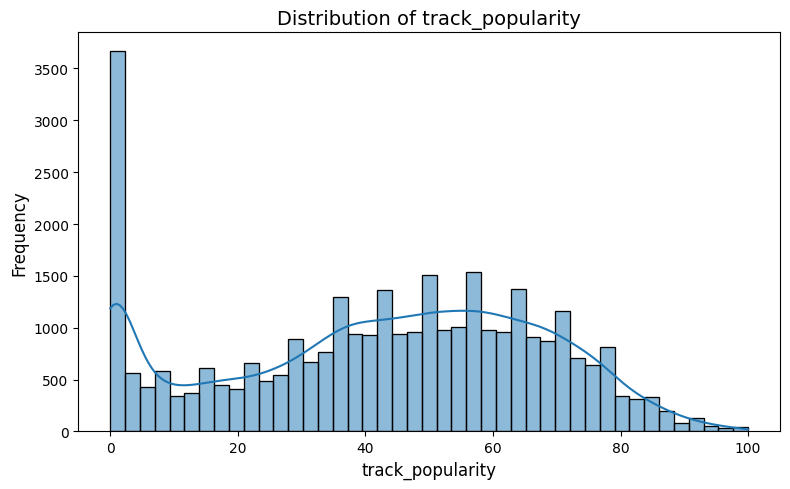

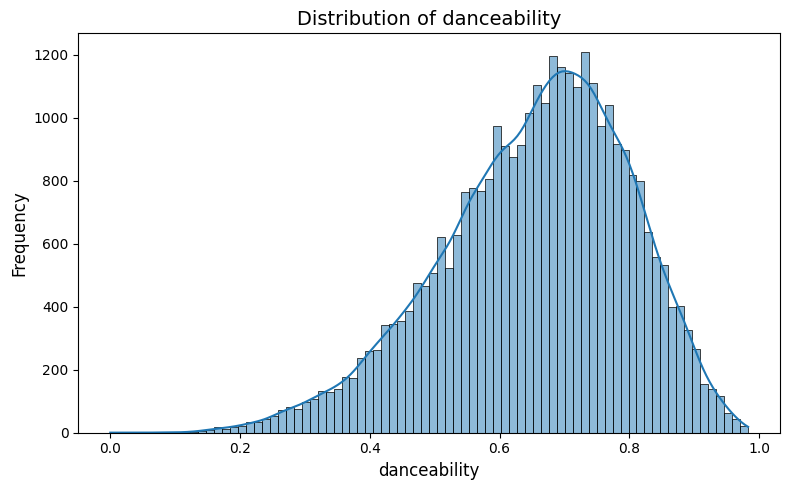

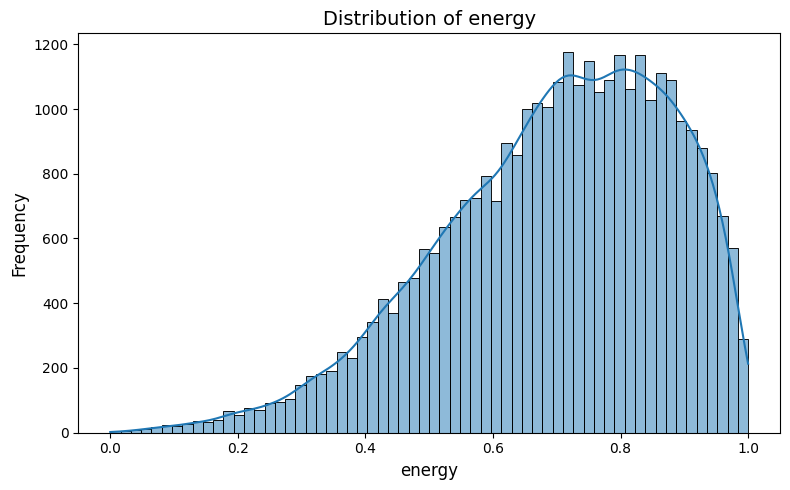

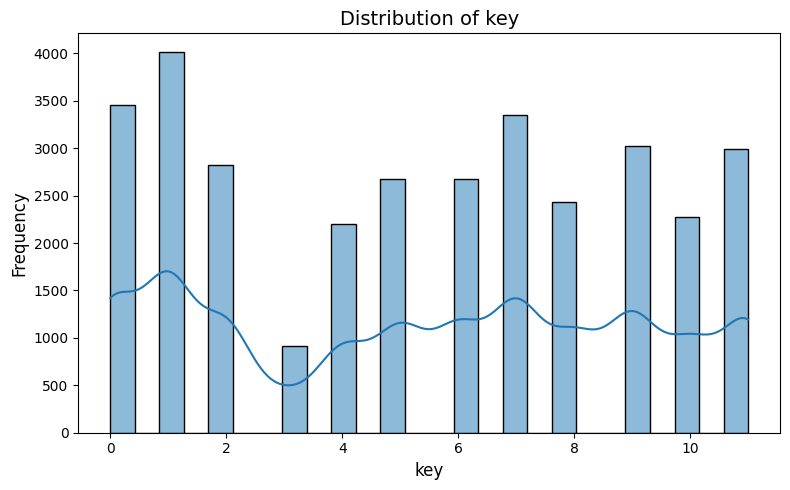

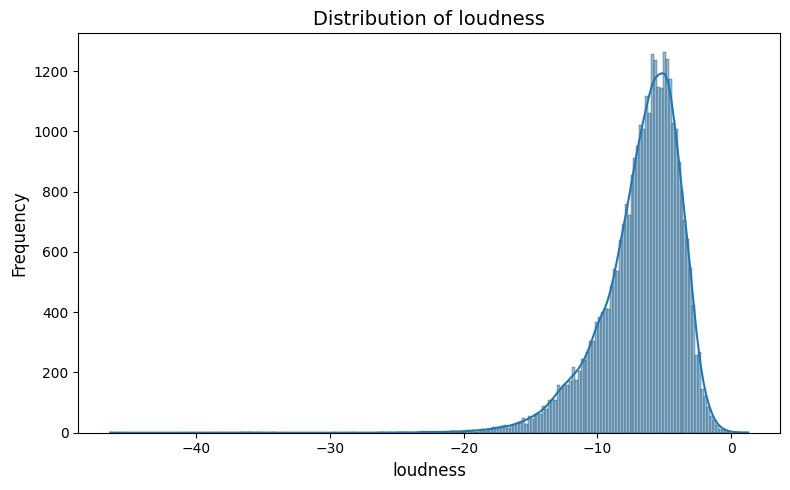

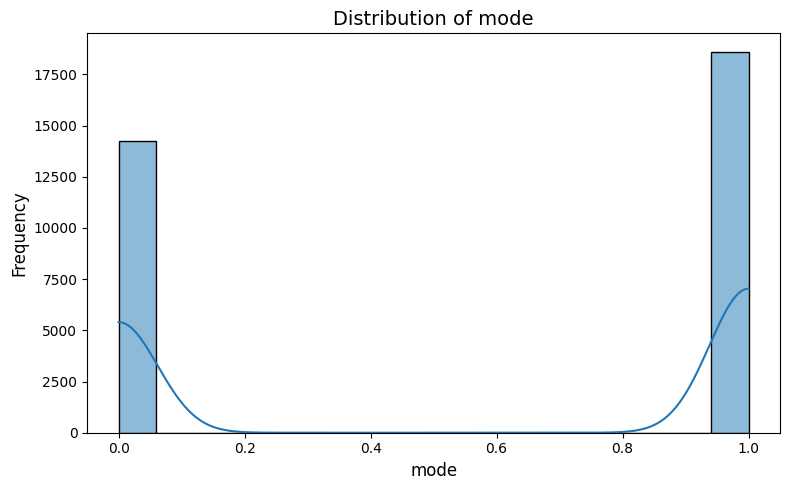

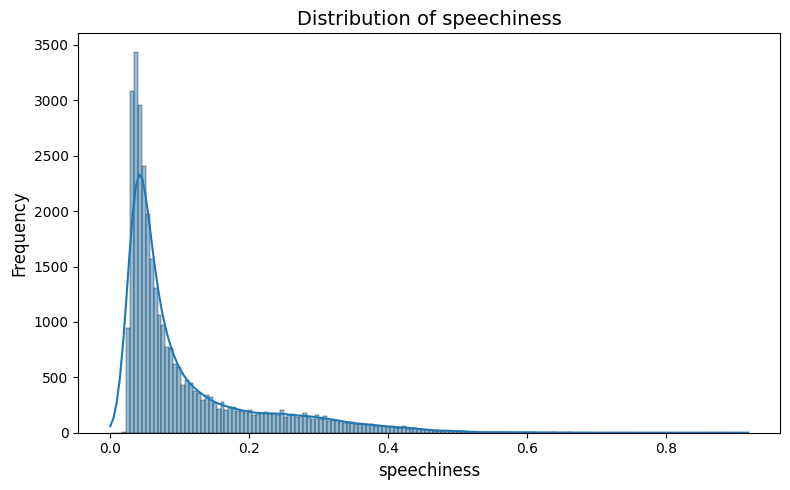

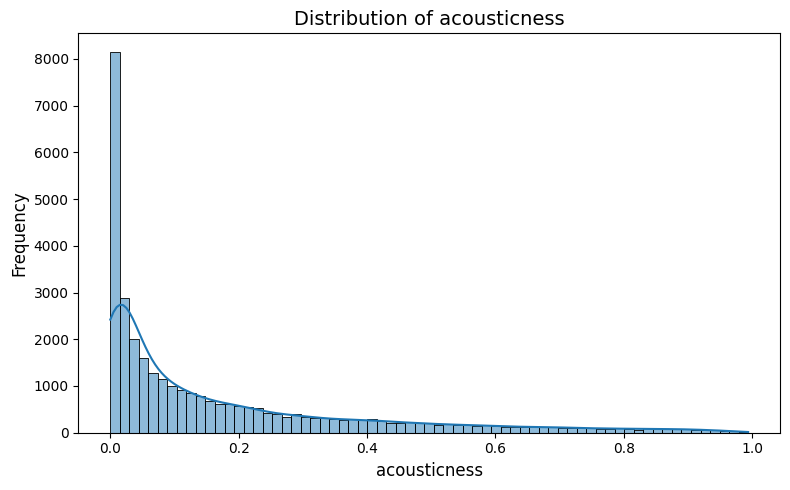

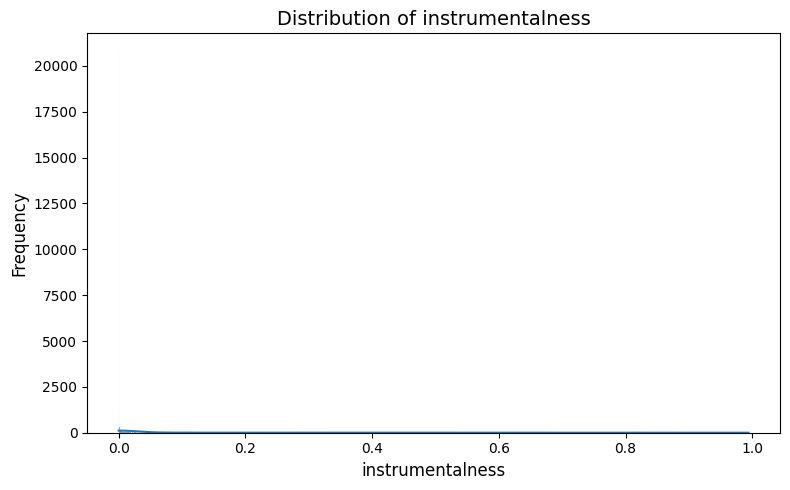

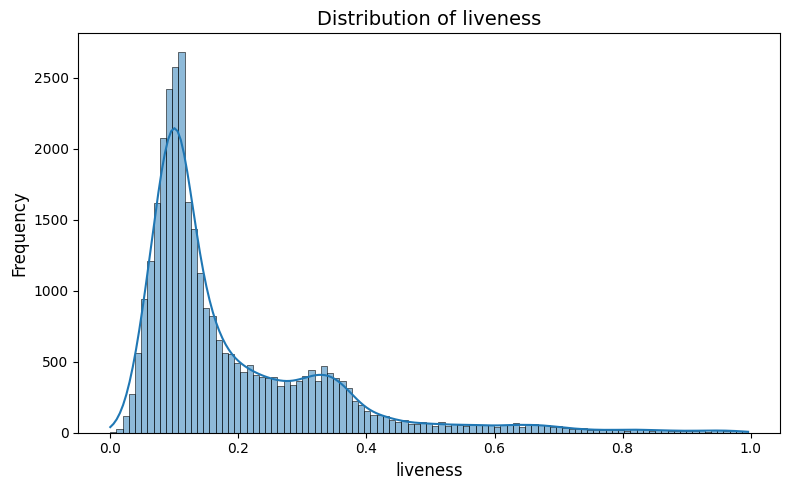

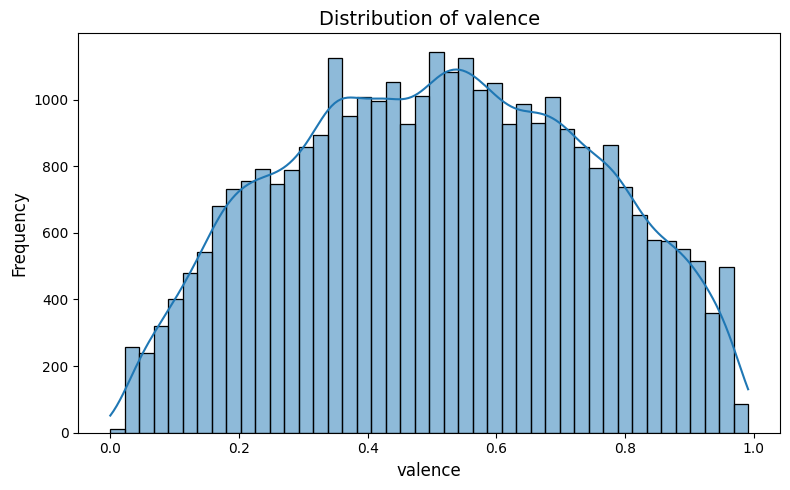

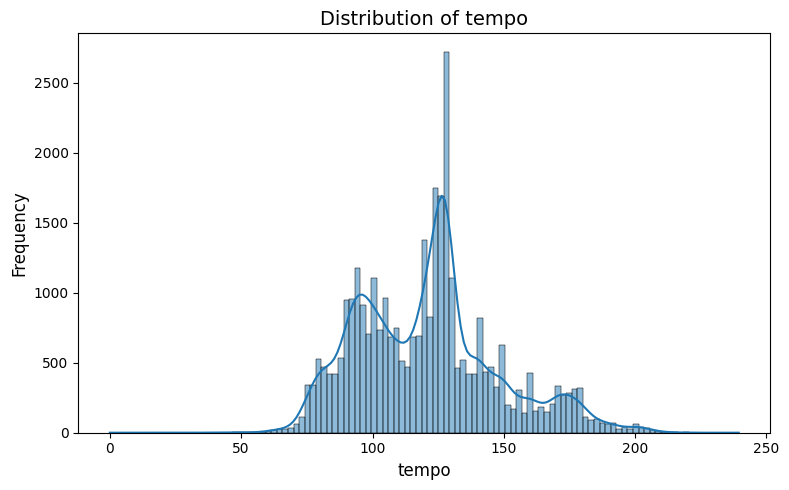

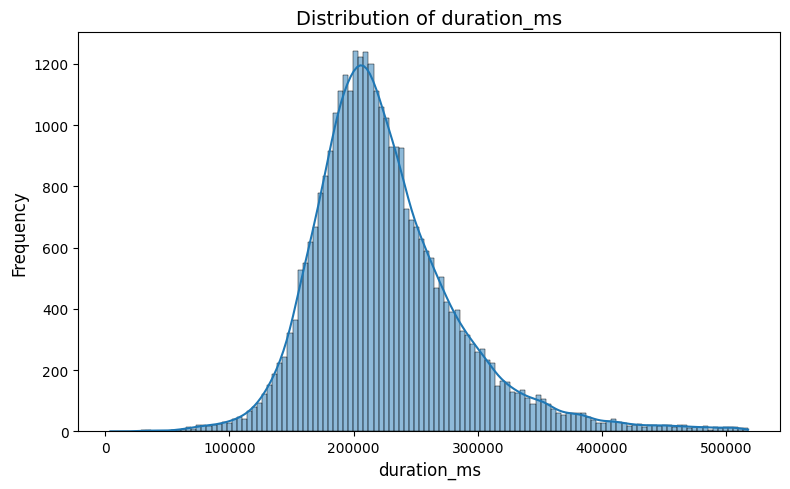

In [5]:
# c. Data quality aspects: missing values, outliers, and plausibility
def check_data_quality(df):
    # Missing Values
    print("\nMissing Values:")
    print(df.isnull().sum())

    # Identifying Outliers using Z-score
    from scipy.stats import zscore
    numerical_features = df.select_dtypes(include=[np.number]).columns
    z_scores = np.abs(zscore(df[numerical_features]))
    outliers = (z_scores > 3).sum(axis=0)
    print("\nOutliers per Numerical Feature (Z-score > 3):")
    print(outliers)

    # Value Distribution
    for col in numerical_features:
        plt.figure(figsize=(8, 5))
        sns.histplot(df[col], kde=True)
        plt.title(f"Distribution of {col}", fontsize=14)
        plt.xlabel(col, fontsize=12)
        plt.ylabel("Frequency", fontsize=12)
        plt.tight_layout()
        plt.show()

check_data_quality(df)

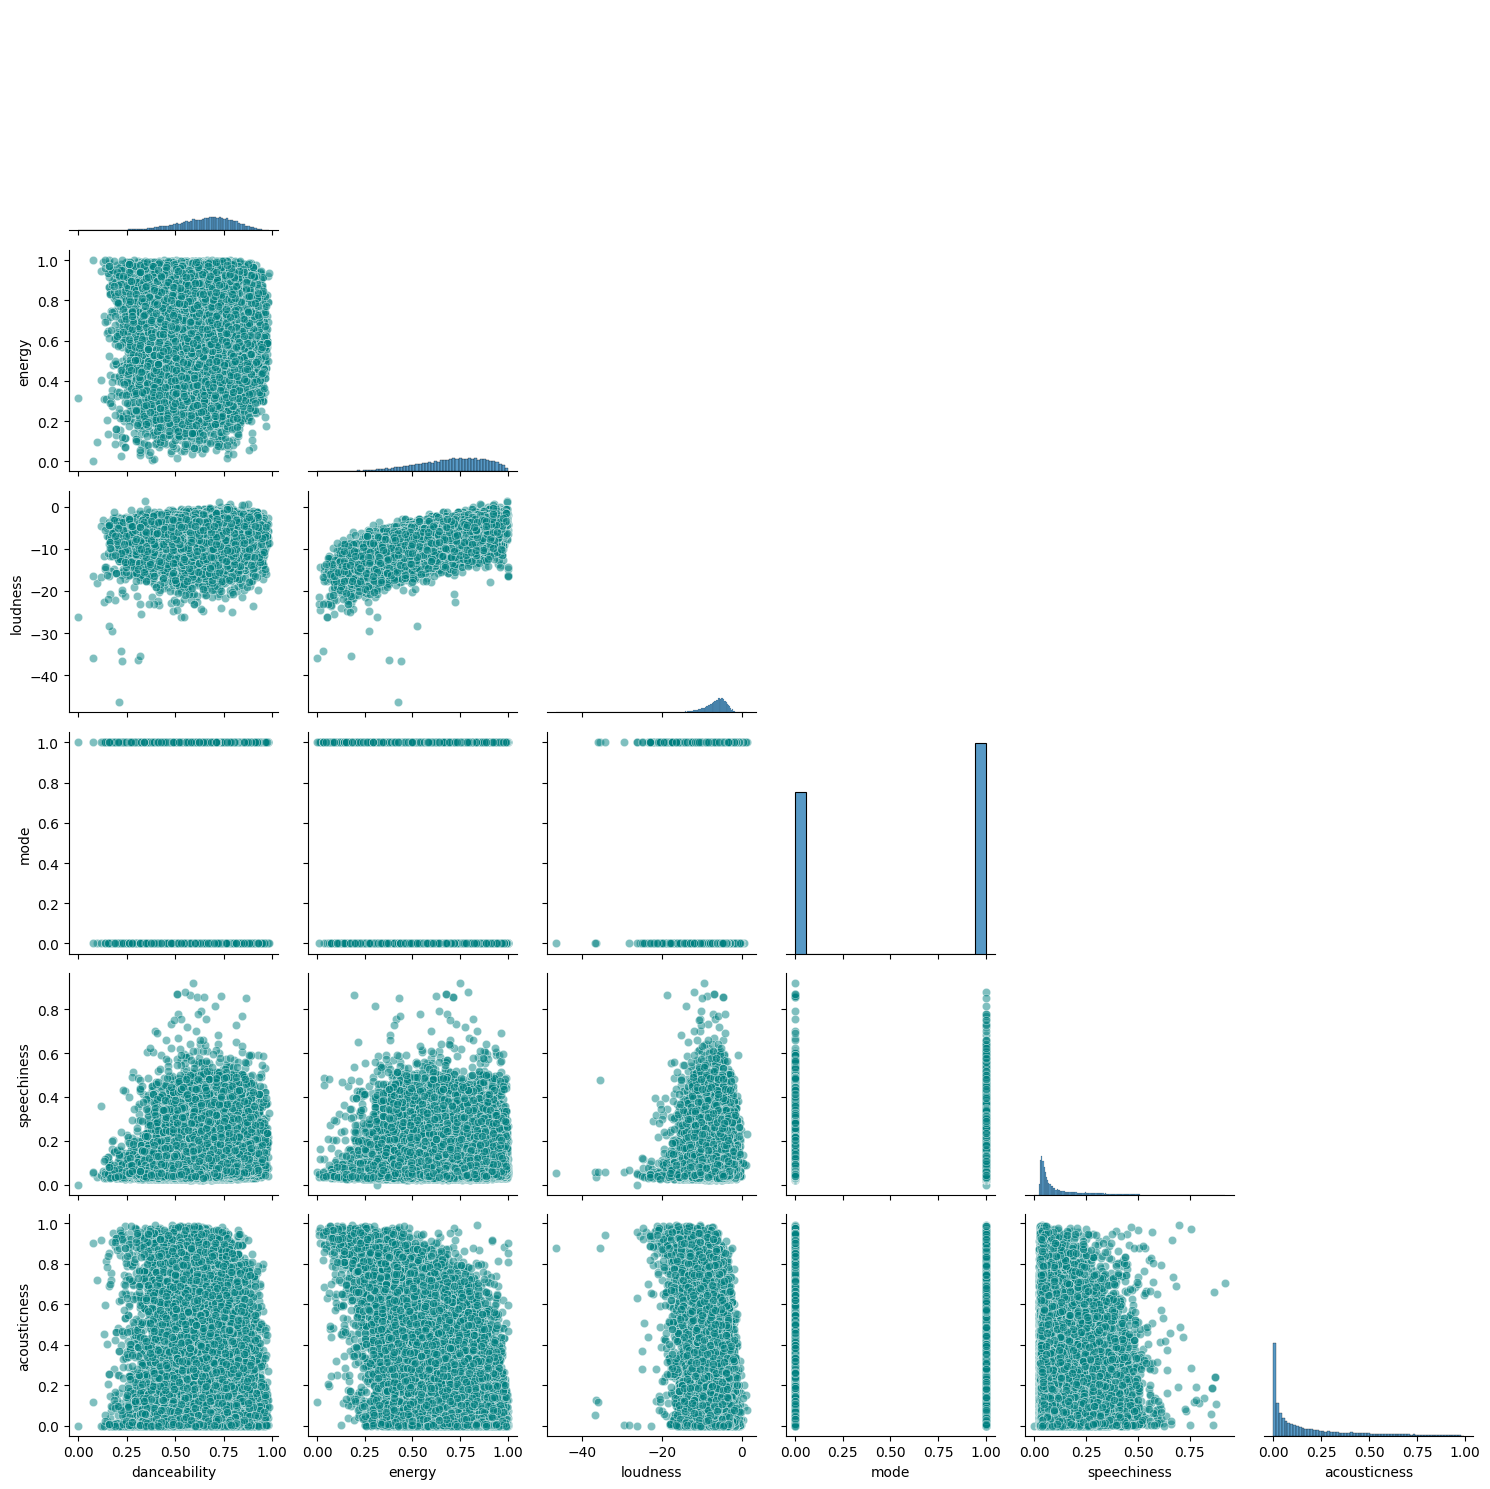

In [7]:
# Define numerical features to include in pairplot
numerical_features = [
    'danceability', 'energy', 'playlist_genre', 'loudness', 'mode', 'speechiness',
    'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms'
]

# Improve the pairplot by:
# 1. Using a smaller subset of features at a time.
# 2. Reducing the figure size for better analysis.
# 3. Adding a histogram for the diagonal for better distribution visualization.

# Create a pairplot with improved parameters
sns.pairplot(df[numerical_features[:7]], diag_kind='hist', corner=True, plot_kws={'alpha': 0.5, 'color': 'teal'}, height=2.5)
plt.tight_layout()
plt.show()

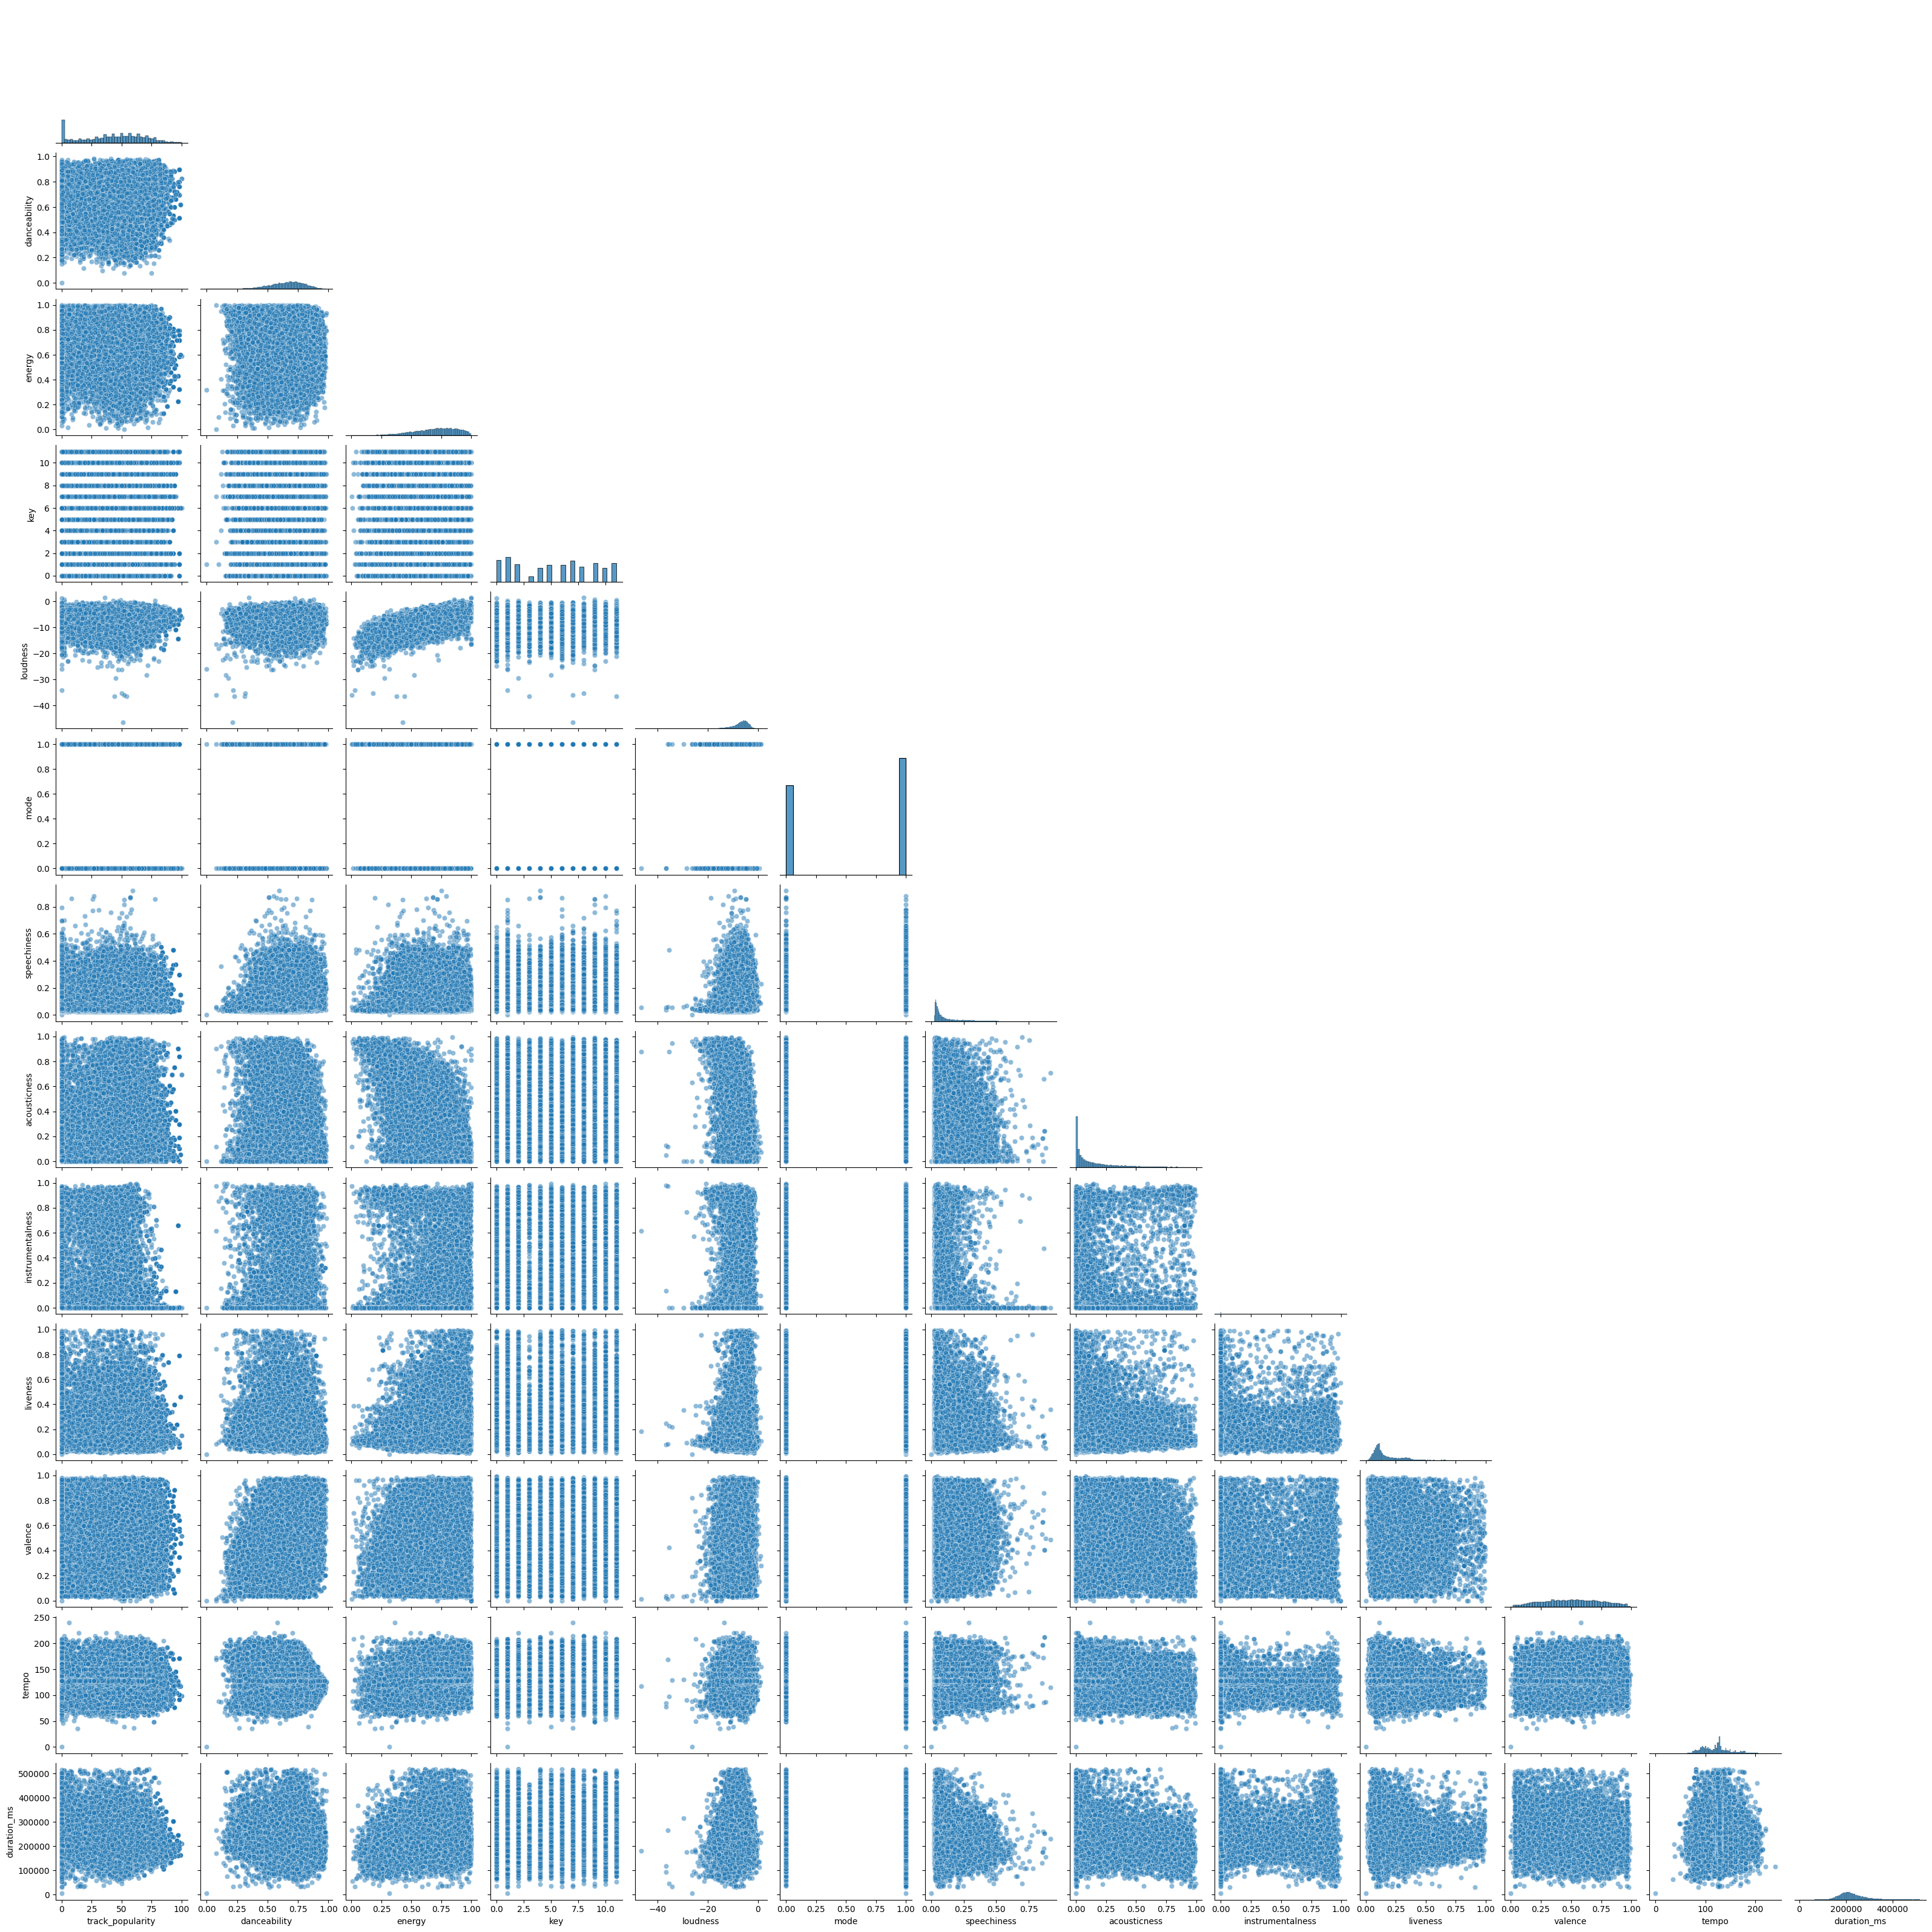


Evaluating Sensitive Attributes and Bias:

Distribution for playlist_genre:
playlist_genre
edm      18.405263
rap      17.500685
pop      16.772759
r&b      16.541285
latin    15.700667
rock     15.079341
Name: proportion, dtype: float64


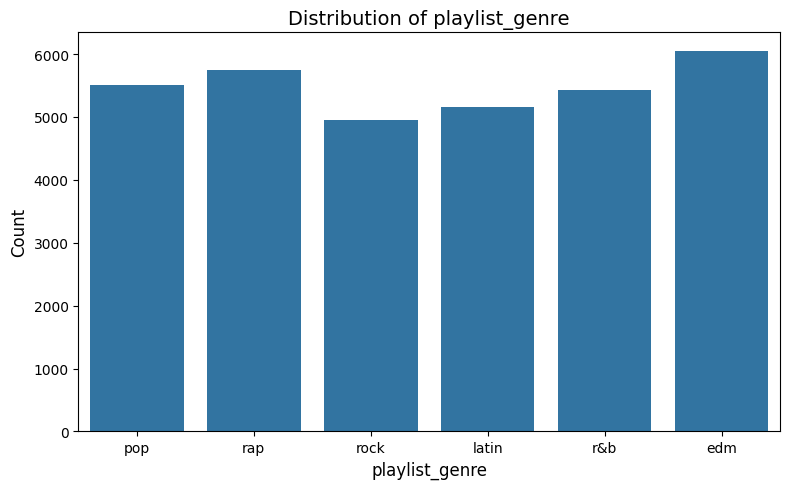


Distribution for mode:
mode
1    56.571133
0    43.428867
Name: proportion, dtype: float64


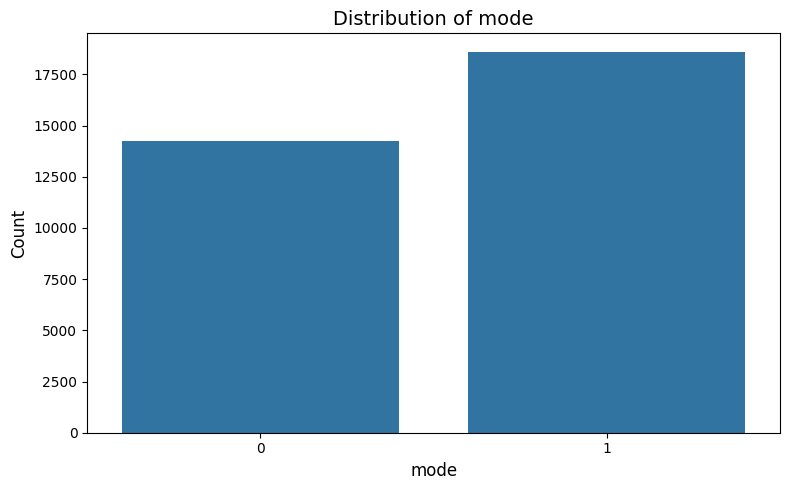

In [ ]:
# e. Evaluation of ethically sensitive attributes and potential biases
def evaluate_bias(df):
    print("\nEvaluating Sensitive Attributes and Bias:")
    # Here you can evaluate bias for sensitive attributes like 'gender', 'ethnicity', etc.
    for col in df.columns:
        if df[col].nunique() < 10:  # Assuming categorical with few unique values
            print(f"\nDistribution for {col}:")
            print(df[col].value_counts(normalize=True) * 100)
            plt.figure(figsize=(8, 5))
            sns.countplot(x=col, data=df)
            plt.title(f"Distribution of {col}", fontsize=14)
            plt.xlabel(col, fontsize=12)
            plt.ylabel("Count", fontsize=12)
            plt.tight_layout()
            plt.show()

evaluate_bias(df)

In [8]:
# f. Identify potential risks and biases in the data
def identify_risks(df):
    print("\nIdentifying Potential Risks and Bias:")
    # Check for imbalance in categorical variables
    for col in df.columns:
        if df[col].dtype == 'object' and df[col].nunique() < 10:
            imbalance_ratio = df[col].value_counts(normalize=True)
            if any(imbalance_ratio > 0.8):
                print(f"High Imbalance Detected in {col}:")
                print(imbalance_ratio)

identify_risks(df)


Identifying Potential Risks and Bias:



Suggested Actions for Data Preparation:
- Consider imputing or removing missing values for the following columns:
track_name          5
track_artist        5
track_album_name    5
dtype: int64

Missing Values:
track_id                    0
track_name                  5
track_artist                5
track_popularity            0
track_album_id              0
track_album_name            5
track_album_release_date    0
playlist_name               0
playlist_id                 0
playlist_genre              0
playlist_subgenre           0
danceability                0
energy                      0
key                         0
loudness                    0
mode                        0
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
tempo                       0
duration_ms                 0
dtype: int64

Outliers per Numerical Feature (Z-score > 3):
track_popularity       0
danceability  

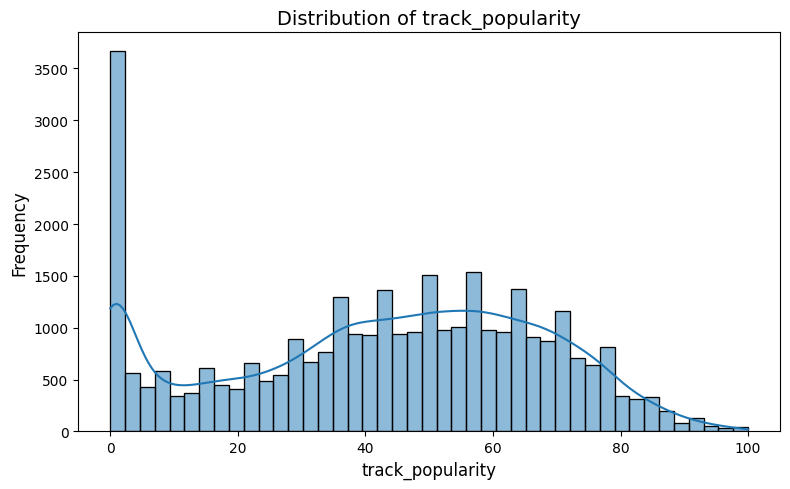

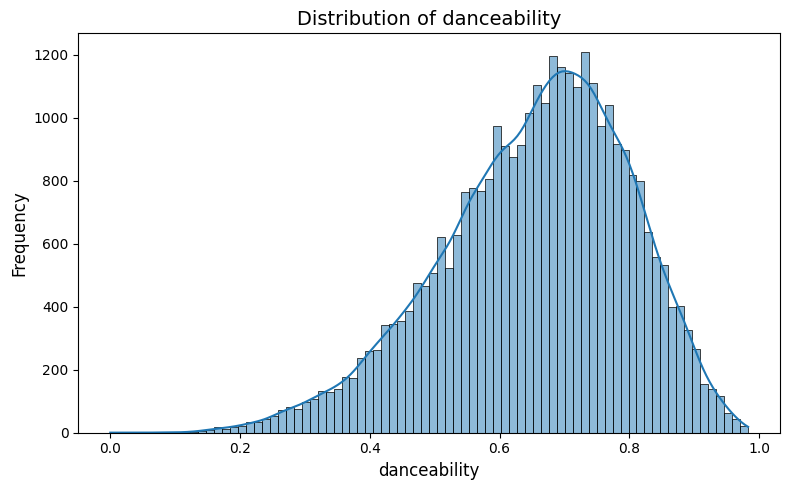

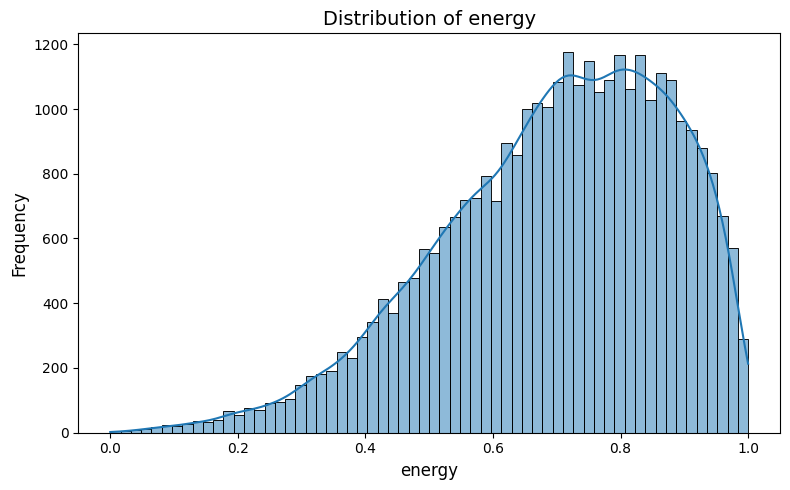

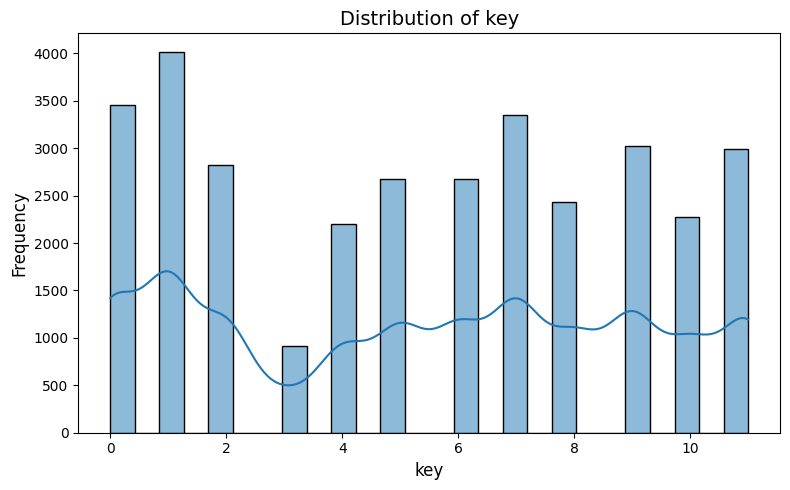

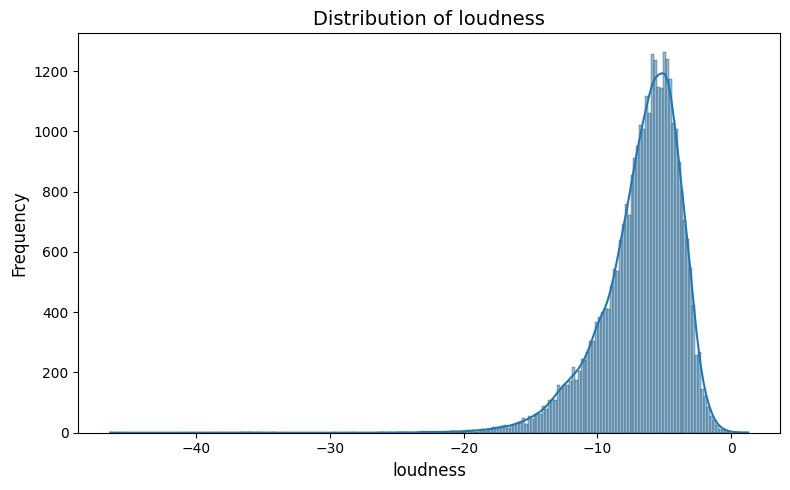

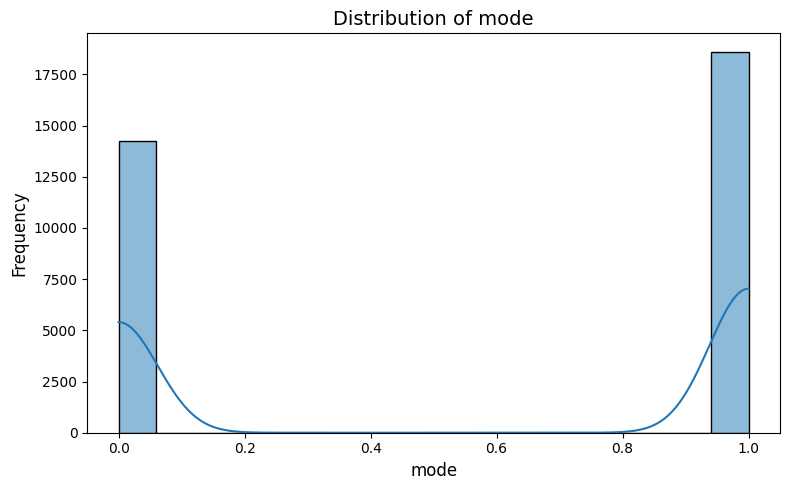

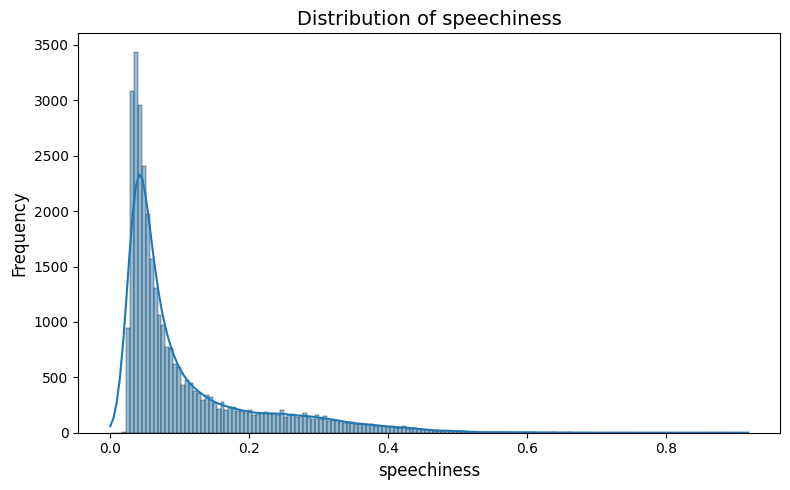

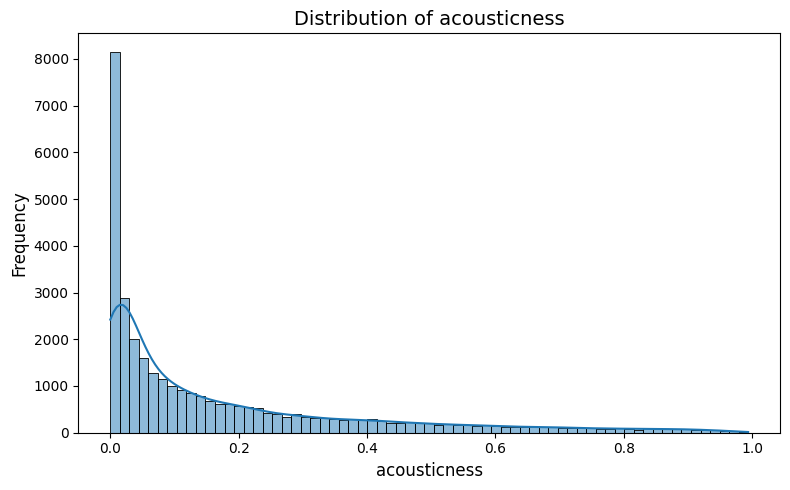

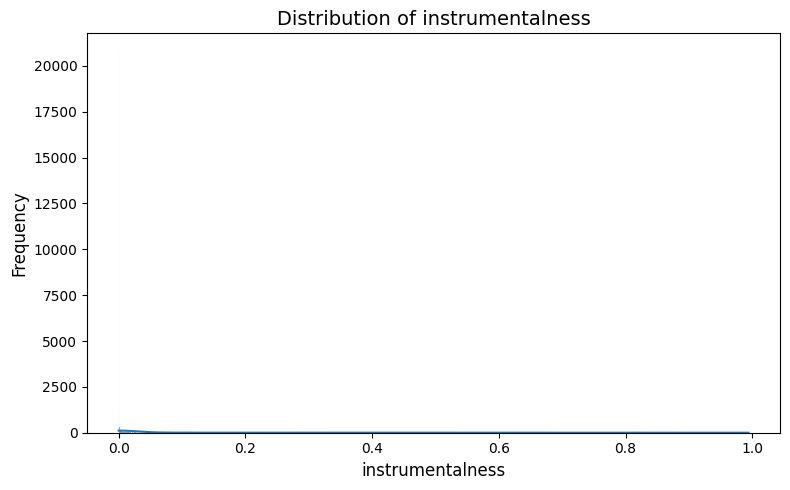

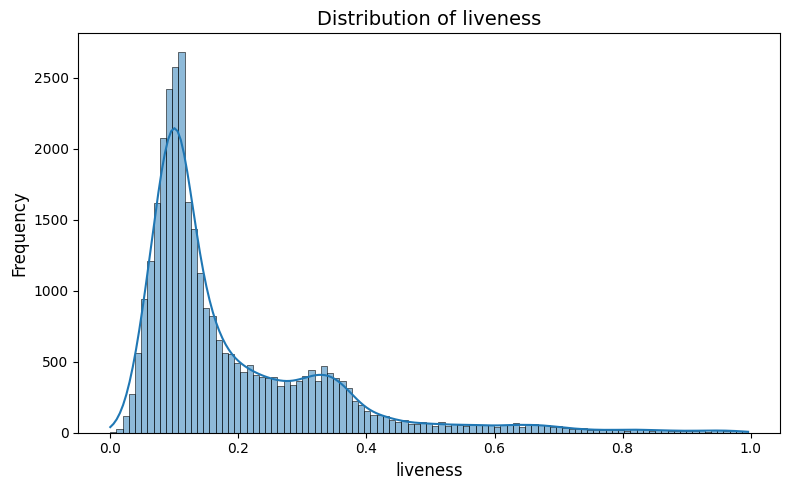

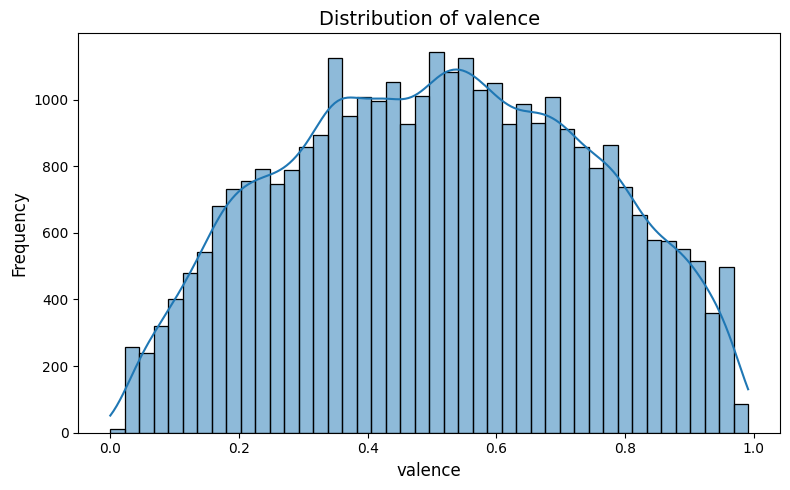

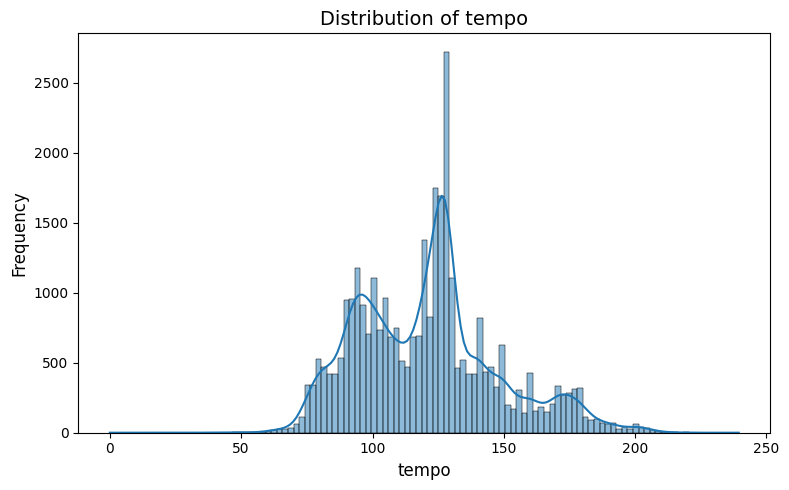

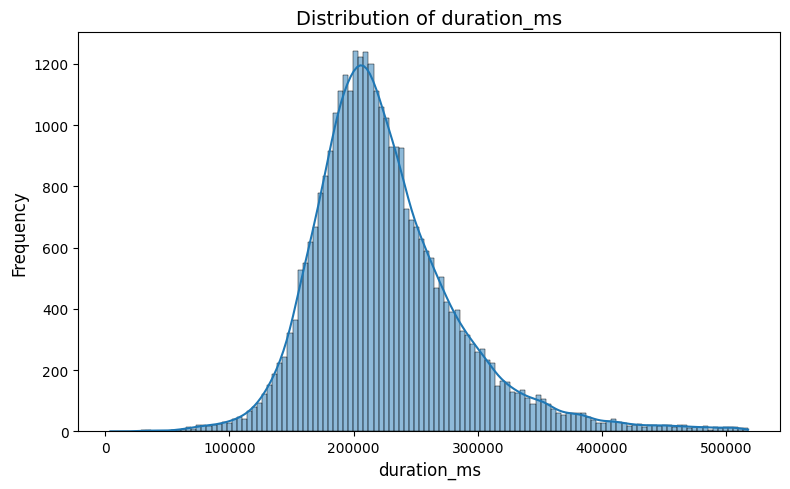

- Consider removing or transforming outliers.

Identifying Potential Risks and Bias:
- Consider resampling techniques to address imbalances, such as SMOTE or undersampling.


In [9]:
def suggest_actions(df):
    print("\nSuggested Actions for Data Preparation:")
    # Handling Missing Values
    missing = df.isnull().sum()
    if missing.any():
        print("- Consider imputing or removing missing values for the following columns:")
        print(missing[missing > 0])
    
    # Handling Outliers
    check_data_quality(df)
    print("- Consider removing or transforming outliers.")
    
    # Handling Imbalanced Data
    identify_risks(df)
    print("- Consider resampling techniques to address imbalances, such as SMOTE or undersampling.")

suggest_actions(df)